In [1]:
import math
import numpy as np
from scipy import integrate
from scipy.stats import norm
from matplotlib import pyplot as plt
import random
import concurrent.futures
import os


%matplotlib inline
tau = 2 * math.pi
pi = math.pi
random.seed(666)

In [ ]:
%run profile_definitions.ipynb

In [3]:
profile = Profile(x,y)
profile.get_aero(freestream_4)
profile.get_limitations()

In [4]:
gen1 = []
for i in range(100):
    gen1.append(profile.copy())

In [5]:
def change(p):
    mu = random.uniform(0, 1)
    d = random.uniform(-4, 4) * profile.shadow
    p.dent(mu, d)
    p.get_aero(freestream_4)
    p.get_limitations()
    print(f"""
    ****
    {mu, d, p.cl, p.shadow, p.ID}
    ****
    """)
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(change, gen1)


    ****
    (0.45611964897696833, 0.386885061988564, 0.7876353773127888, 0.12143645142998788, 5)
    ****
    

    ****
    (0.4343754968307887, 0.0006011489878750445, 0.5058399002249412, 0.11990542142526467, 6)
    ****
    

    ****
    (0.8113594841043066, 0.05148618176324123, 0.49884147820611724, 0.12004687748716394, 7)
    ****
    

    ****
    (0.7121747682476842, -0.36149844849512824, 0.47407552958525834, 0.1264940537344128, 8)
    ****
    

    ****
    (0.8147597621524992, -0.10983943495150844, 0.5247363212356232, 0.12071744642177501, 9)
    ****
    

    ****
    (0.6291099598044565, 0.37585619369781514, 0.6260843659703651, 0.12459311426373171, 10)
    ****
    

    ****
    (0.9216589677068021, 0.10600851800469804, 0.4606579681473151, 0.12089356340266683, 14)
    ****
    

    ****
    (0.9888178277721876, -0.4635398211732394, 0.7854078140516219, 0.14078714021168953, 11)
    ****
    

    ****
    (0.68155299240808, -0.3167700767002127, 0.4413447756258125, 0.12397


    ****
    (0.6668791463367805, -0.3809074794862084, 0.4284348449263118, 0.12601057632017756, 85)
    ****
    

    ****
    (0.34729421788051484, -0.1402793991815251, 0.36684711956953414, 0.11990542142526467, 89)
    ****
    
    ****
    (0.895502232931049, 0.02705201061236495, 0.49590280692610256, 0.11990542142526467, 77)
    ****
    



    ****
    (0.7599181332701566, -0.12533327303750588, 0.5082881002613355, 0.12082375469435608, 81)
    ****
    
    ****
    (0.7687934244465822, -0.3724989939811249, 0.514333242010763, 0.12789153977165726, 82)
    ****
    

    ****
    (0.9829453947915322, -0.007909997239019544, 0.5100257614399129, 0.11990542142526467, 68)
    ****
    


    ****
    (0.23090522157513382, -0.35885462358264825, 0.07776164763336747, 0.12018643422053013, 90)
    ****
    
    ****
    (0.05768879717198083, -0.3327794810593423, 0.024587349073641917, 0.1224497931532323, 94)
    ****
    

    ****
    (0.19644992331770628, -0.2112325795586008, 0.239802182510

In [6]:
def make_children(P, n = 10):
    children = []
    for i in range(n):
        children.append(P.copy())
    for p in children:
        mu = random.uniform(0, 1)
        d = random.uniform(-4, 4) * profile.shadow
        p.dent(mu, d)
        p.get_aero(freestream_4)
        p.get_limitations()
    
    print(f"***Finished children of {P.ID}***")
    return children

children = make_children(gen1[0], 2)

(children[0].ID,children[1].ID)

***Finished children of 5***


(105, 106)

In [7]:
gen2 = []

with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = [executor.submit(make_children, P) for P in gen1]
    
    gen2_lists = [future.result() for future in concurrent.futures.as_completed(futures)]
    
gen2 = [item for sublist in gen2_lists for item in sublist]

***Finished children of 5***
***Finished children of 9***
***Finished children of 7***
***Finished children of 17******Finished children of 13***

***Finished children of 15***
***Finished children of 6******Finished children of 8***

***Finished children of 12******Finished children of 18******Finished children of 10***


***Finished children of 24***
***Finished children of 22***
***Finished children of 14***
***Finished children of 11***
***Finished children of 23***
***Finished children of 16***
***Finished children of 21***
***Finished children of 19***
***Finished children of 20***
***Finished children of 25***
***Finished children of 28***
***Finished children of 27******Finished children of 33***
***Finished children of 26***

***Finished children of 29******Finished children of 30***

***Finished children of 35***
***Finished children of 37***
***Finished children of 40******Finished children of 41***

***Finished children of 31***
***Finished children of 32***
***Finished chi

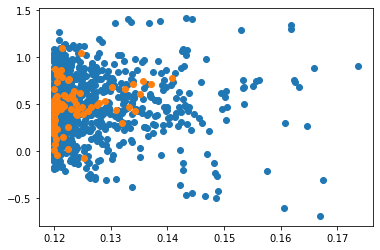

In [8]:
plt.scatter([p.shadow for p in gen2], [p.cl for p in gen2])
plt.scatter([p.shadow for p in gen1], [p.cl for p in gen1])

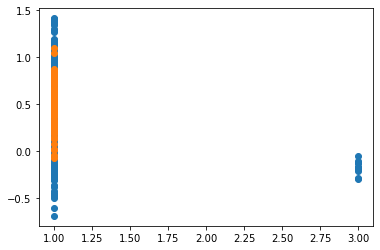

In [21]:
plt.scatter([p.roughness for p in gen2], [p.cl for p in gen2])
plt.scatter([p.roughness for p in gen1], [p.cl for p in gen1])

In [10]:
(min([p.cl for p in gen1]), max([p.cl for p in gen1]))

(-0.07456948864862946, 1.096546334215618)

In [11]:
(min([p.shadow for p in gen1]), max([p.shadow for p in gen1]))

(0.11990542142526464, 0.14078714021168953)

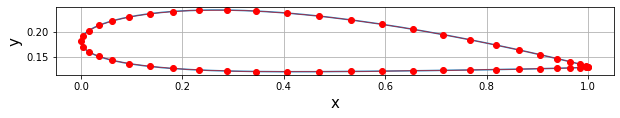

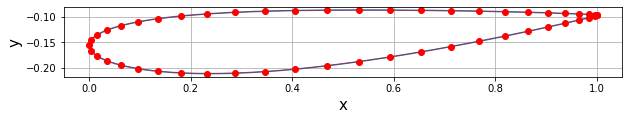

In [14]:
max(gen1, key = lambda p: p.cl).draw()
min(gen1, key = lambda p: p.cl).draw()

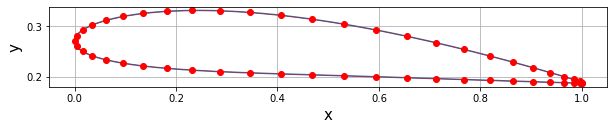

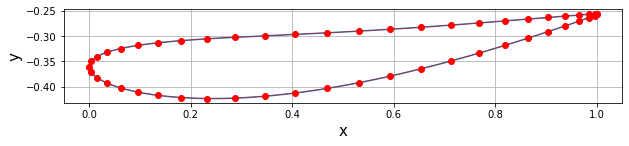

In [16]:
max(gen2, key = lambda p: p.cl).draw()
min(gen2, key = lambda p: p.cl).draw()

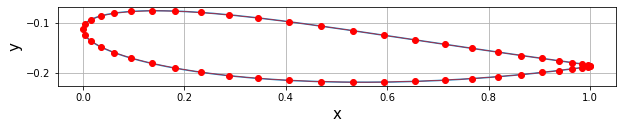

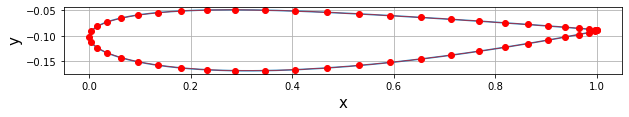

In [15]:
max(gen1, key = lambda p: p.shadow).draw()
min(gen1, key = lambda p: p.shadow).draw()

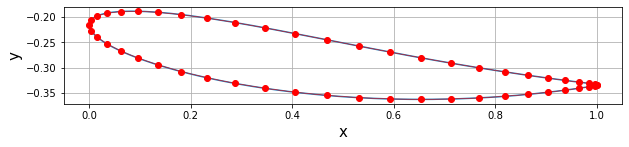

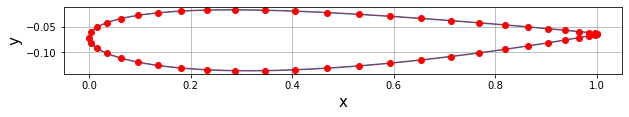

In [17]:
max(gen2, key = lambda p: p.shadow).draw()
min(gen2, key = lambda p: p.shadow).draw()